## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [ ]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [115]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import os
import json
import time
import tweepy
import jsonpickle
import preprocessor as p
import nltk
from nltk.corpus import stopwords
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
#nltk.download('punkt')

In [8]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys
import re
import fire
from collections import Counter

In [3]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='h2',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_elements)

In [4]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa')
res

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

In [ ]:
res[0]

In [5]:
mylist_100_inf=[]
for i in res:
    if len(mylist_100_inf)<100:
        mylist_100_inf.append(i.split('@')[-1].split(')')[0])


In [6]:
mylist_100_df=pd.DataFrame(mylist_100_inf)
#mylist.to_csv('10 influencers.csv')

In [7]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [ ]:
response

In [8]:
res = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})
res

findaing all of {'class_': 'wp-block-embed__wrapper'}


['African leaders respond to coronavirus… on Twitter',
 '\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dn

In [9]:
regex ='#https?://twitter\.com/(?:\#!/)?(\w+)/status(es)?/(\d+)#is'
a=re.match('((https?://)?(www\.)?twitter\.com/)(@|#!/)?([A-Za-z0-9_]{1,15})(/([-a-z]{1,20}))?','https://twitter.com/SE_Rajoelina/status/1241101811647500288')
#print(a.group(0))


https://twitter.com/SE_Rajoelina/status


In [10]:
mylist=[]
for i in res:
    a=re.search('((https?://)?(www\.)?twitter\.com/)?(@|#!/)([A-Za-z0-9_]{1,15})(/([-a-z]{1,20}))?',str(i))
    if a!=None:
        mylist.append((a[0]))
mylist[:10]
#mylist=pd.DataFrame(mylist[:10])
#mylist.to_csv('10 African leaders.csv')

['@EswatiniGovern1',
 '@MalawiGovt',
 '@hagegeingob',
 '@FinanceSC',
 '@PresidencyZA',
 '@Dora_Siliya',
 '@edmnangagwa',
 '@MinSantedj',
 '@hawelti',
 '@StateHouseKenya']

In [11]:
consumer_key = '#########'
consumer_secret = '#########'
access_token = '#########'
access_token_secret = '#########'

In [18]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

    

In [27]:
##No of likes
fav_count={i:'x' for i in mylist}
No_of_followers={i :'x'for i in mylist}
No_of_following={i :'x'for i in mylist}
for i in mylist:
        user = api.get_user(i)
        fav_count[i]=user.favourites_count
        No_of_followers[i]=user.followers_count
        No_of_following[i]=user.friends_count
        

In [67]:
#for tweet in tweepy.Cursor(api.user_timeline,id=mylist[0]).items():
   # print (tweet)
    #op=tweet._json
#op['entities']['hashtags'][0]['text']
op

{'created_at': 'Fri Jul 10 12:53:24 +0000 2020',
 'id': 1281572227918499845,
 'id_str': '1281572227918499845',
 'text': "[WATCH LIVE]: Prime Minister Ambrose Mandvulo Dlamini provides updates on Government's response to #COVID19. https://t.co/Vc1QQoepd1",
 'truncated': False,
 'entities': {'hashtags': [{'text': 'COVID19', 'indices': [99, 107]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/Vc1QQoepd1',
    'expanded_url': 'https://www.pscp.tv/w/cdcJHzFWR2p2eW5Sd29kS098MW1yeG1FRHluakx4eQJXVm7CHnHSsTaWR3PklgucQUqDnBvNS0Z9sj_P4yHe',
    'display_url': 'pscp.tv/w/cdcJHzFWR2p2…',
    'indices': [109, 132]}]},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1181832897508065280,
  'id_str': '1181832897508065280',
  'name': 'Eswatini Gov

In [112]:
##Mentions
mention_count={i:'x' for i in mylist}
for i in my_list:
    for results in tweepy.Cursor(twitter_api.search, q=i).items(200):
        op=tweet._json  
        count=+1
        mention_count[i]=count
    

KeyboardInterrupt: 

In [126]:
for j in mylist_100_inf:
    try:
        tweets = api.user_timeline(screen_name=j, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended')
    except tweepy.TweepError:
            continue
    for tweet in tweets:
            tweet_json=tweet._json
            date=[]
            tweet=[]
            users_mention=[]
            hashtag=[]
            retweet_count=[]
            retweeted=[]
            location=[]
            followers=[]
            verified=[]
            country=[]
            fav_count=[]
            user=[]
            comment=[]
            following=[]

            
            i=tweet_json
            #print (j)
            #country.append(i['place']['country'])
            fav_count.append(i['favorite_count'])
            user.append(j)
            verified.append(i['user']['verified'])
            followers.append(i['user']['followers_count'])
            location.append(i['user']['location'])
            date.append(i['created_at'])
            tweet.append(i['full_text'])
            try:
                users_mention.append(i['entities']['user_mentions'][0]['screen_name'])
            except IndexError as e:
                users_mention.append('Nan')
            try:
                hashtag.append(i['entities']['hashtags'][0]['text'])
            except IndexError as e:
                hashtag.append('Nan')
            retweet_count.append(i['retweet_count'])
            retweeted.append(i['retweeted'])
            if i['in_reply_to_status_id']:
                comment.append(1)
            else:
                comment.append(0)
            following.append(i['user']['friends_count'])
            dict={'date_created':date,'user':user,'tweet':tweet,'user_mention':users_mention,'retweet_count':retweet_count
                ,'retweeted':retweeted,'location':location,'followers':followers,'following':following,'verfied':verified,'hashtag':hashtag,'comment':comment,'likes':fav_count}
            df=pd.DataFrame(dict)
            try:
                I_A=pd.concat([df,I_A])
            except NameError:
                I_A=df
    
  
    


In [296]:

I_A.to_csv('Influencer.csv')

In [304]:

Ireachscore=[]
Ipopularityscore=[]
for i in mylist_100_inf:
    retweet=I_A.loc[I_A['user']==i, 'retweet_count'].sum()
    Ipopularityscore.append(retweet)
    try:
        Ireachscore.append(I_A.loc[I_A['user']==i, 'followers'].unique().item()-I_A.loc[I_A['user']==i, 'following'].unique().item())
    except ValueError  :
        Ireachscore.append(0)
    

In [310]:

Areachscore=[]
Apopularityscore=[]
for i in mylist:
    retweet=f_A.loc[f_A['user']==i, 'retweet_count'].sum()
    Apopularityscore.append(retweet)
    try:
        Areachscore.append(f_A.loc[f_A['user']==i, 'followers'].unique().item()-f_A.loc[f_A['user']==i, 'following'].unique().item())
    except ValueError  :
        Areachscore.append(0)
    

In [311]:
influencer_score=pd.DataFrame({'Influencer':mylist_100_inf,'reach':Ireachscore,'Popularity':Ipopularityscore})
Leaders_score=pd.DataFrame({'Influencer':mylist,'reach':Areachscore,'Popularity':Apopularityscore})
influencer_score.to_csv('influencer_score.csv')
Leaders_score.to_csv('Leaders_score')
Leaders_score


,Influencer,reach,Popularity
0,@EswatiniGovern1,11236,1015
1,@MalawiGovt,39275,3085
2,@hagegeingob,192411,10086
3,@FinanceSC,-98,18
4,@PresidencyZA,1599116,6670
5,@Dora_Siliya,40826,2191
6,@edmnangagwa,546340,39272
7,@MinSantedj,2807,708
8,@hawelti,65804,10118
9,@StateHouseKenya,1103795,23697


In [128]:

for j in mylist:
    try:
        tweets = api.user_timeline(screen_name=j, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended')
    except tweepy.TweepError:
            continue
    for tweet in tweets:
            tweet_json=tweet._json
            date=[]
            tweet=[]
            users_mention=[]
            hashtag=[]
            retweet_count=[]
            retweeted=[]
            location=[]
            followers=[]
            verified=[]
            country=[]
            fav_count=[]
            user=[]
            comment=[]
            following=[]

            
            i=tweet_json
            #print (j)
            #country.append(i['place']['country'])
            fav_count.append(i['favorite_count'])
            user.append(j)
            verified.append(i['user']['verified'])
            followers.append(i['user']['followers_count'])
            location.append(i['user']['location'])
            date.append(i['created_at'])
            tweet.append(i['full_text'])
            try:
                users_mention.append(i['entities']['user_mentions'][0]['screen_name'])
            except IndexError as e:
                users_mention.append('Nan')
            try:
                hashtag.append(i['entities']['hashtags'][0]['text'])
            except IndexError as e:
                hashtag.append('Nan')
            retweet_count.append(i['retweet_count'])
            retweeted.append(i['retweeted'])
            if i['in_reply_to_status_id']:
                comment.append(1)
            else:
                comment.append(0)
            following.append(i['user']['friends_count'])
            dict={'date_created':date,'user':user,'tweet':tweet,'user_mention':users_mention,'retweet_count':retweet_count
                ,'retweeted':retweeted,'location':location,'followers':followers,'following':following,'verfied':verified,'hashtag':hashtag,'comment':comment,'likes':fav_count}
            df=pd.DataFrame(dict)
            try:
                f_A=pd.concat([df,f_A])
            except NameError:
                f_A=df
    
  
    


In [298]:
f_A.to_csv('African Leaders.csv')

In [5]:
#f_A=pd.read_csv(r'C:\Users\Hp\Downloads\African Leaders.csv')
#I_A=pd.read_csv(r'C:\Users\Hp\Downloads\Influencer.csv')

In [16]:


newfile=pd.concat([f_A,I_A])
a=Counter(newfile.hashtag)
del a['Nan']
a={k: v for k, v in sorted(a.items(),reverse=True, key=lambda item: item[1])}

a=a.items()
a=[i[0] for i in a]
record_I={i:'x' for i in a[:5]}
for i in a[:5]:
    record_I[i]=len(I_A.loc[I_A['hashtag']==i])
record_A={i:'x' for i in a[:5]}
for i in a[:5]:
    record_A[i]=len(f_A.loc[f_A['hashtag']==i])

In [17]:
record_I=list(record_I.values())
record_A=list(record_A.values())
sum_T=sum(record_I)+sum(record_A)
record_I=[100*i/sum(record_I) for i in record_I]
record_A=[100*i/sum(record_A) for i in record_A]


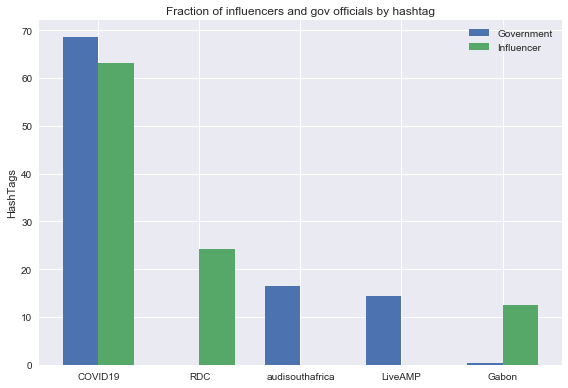

In [19]:
labels=a[:5]
x = np.arange(len(labels))  # the label locations
width = 0.35
plt.style.use('seaborn')
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, record_I, width, label='Government')
rects2 = ax.bar(x + width/2, record_A, width, label='Influencer')
ax.set_ylabel('HashTags')
ax.set_title('Fraction of influencers and gov officials by hashtag')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()
fig.savefig('final plot.jpg')

plt.show()